# Bi-variate Discrete Distributions

Open in Google Colab: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/febse/stat2024/blob/main/08-Bi-variate-Discrete-Distributions.ipynb)

Until now we have been dealing with univariate distributions, i.e., distributions of a single random variable. In this notebook, we will discuss bi-variate distributions, i.e., distributions of two random variables. We will start with the simplest case, the joint distribution of two discrete random variables.

## Joint Distribution

Until now we have discussed the probability mass function (pmf) of a single discrete random variable. It answers questions such as "What is the probability that the random variable takes the value $x$?". It is very common that we are interested in more than out random variable. For example, we might conduct an experiment where we assign different marketing strategies to groups of customers and measure the number of products they buy. In that case we might be interested in the joint outcome of the marketing strategy and the number of products bought.

For discrete distributions with a limited number of outcomes, we can represent the joint distribution as a table. For example, consider the following table of two random variables $X$ and $Y$. $X$ can take the values 0, 1, 2, and 3, and $Y$ can take the values 2, and 3. The cells of the table contain the probability that the random variables take the corresponding values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import a couple of csv files from github
px = pd.read_csv("https://raw.githubusercontent.com/febse/data/main/econ/prob_review/px.csv")
py = pd.read_csv("https://raw.githubusercontent.com/febse/data/main/econ/prob_review/py.csv")
pxy = pd.read_csv("https://raw.githubusercontent.com/febse/data/main/econ/prob_review/pxy.csv")

# Select specific columns
pxy = pxy[['x', 'y', 'p']]

pxy_table = pd.pivot_table(pxy, values='p', index='x', columns='y')
pxy_table

y,2,3
x,,
0,0.241,0.009
1,0.089,0.006
2,0.229,0.043
3,0.201,0.182


So we can look up probabilities such as

$$
P(X=0, Y=2) = 0.241
$$

directly from the table. We will write the PMF of two random variables $X$ and $Y$ as 

$$
f_{XY}(x, y) = P_{XY}(X=x, Y=y)
$$.

As the PMF of a single random variable, the joint PMF must satisfy the following properties:

1. $f_{XY}(x, y) \geq 0$ for all $x$ and $y$.
2. $\sum_x \sum_y f_{XY}(x, y) = 1$.


In [2]:
# Verify that the sum of all probabilities is 1

pxy_table.sum().sum()

1.0

# Marginal Distributions

If we have a joint distribution of two random variables, we can calculate the marginal distribution of each of the random variables, which are simply the univariate distributions of each of the random variables. For example, the marginal distribution of $X$ is

$$
f_X(x) = \sum_y f_{XY}(x, y)
$$

and the marginal distribution of $Y$ is

$$
f_Y(y) = \sum_x f_{XY}(x, y)
$$


In [3]:
# The marginal distribution of y is the sum of the rows of the table

pxy_table.sum(axis=0)

y
2    0.76
3    0.24
dtype: float64

In [4]:
# The marginal distribution of x is the sum of the columns of the table
pxy_table.sum(axis=1)

x
0    0.250
1    0.095
2    0.272
3    0.383
dtype: float64

## Conditional Distributions

A lot of questions in applied research boil down to the comparisons of conditional probabilities. For example, we might be interested in the probability that a customer buys a product given that they have been exposed to a certain marketing strategy or that a patient survives a decease given that they have been treated with a certain drug.

To be able to answer these questions, we need to calculate the conditional distribution of one random variable given the other. The conditional distribution of $X$ given $Y$ is defined as

$$
f_{X|Y}(x|y) = P(X=x|Y=y) = \frac{P(X=x, Y=y)}{P(Y=y)} = \frac{f_{XY}(x, y)}{f_Y(y)}
$$

and of course the conditional distribution of $Y$ given $X$ is

$$
f_{Y|X}(y|x) = P(Y=y|X=x) = \frac{P(X=x, Y=y)}{P(X=x)} = \frac{f_{XY}(x, y)}{f_X(x)}
$$


In [5]:
# Conditional distribution of x given y

x_marginal = pxy_table.sum(axis=0)
print(x_marginal)

px_given_y = pxy_table.div(x_marginal, axis=1)
px_given_y

y
2    0.76
3    0.24
dtype: float64


y,2,3
x,,
0,0.317105,0.037500
1,0.117105,0.025000
2,0.301316,0.179167
3,0.264474,0.758333


In [6]:
# Conditional distribution of y given x

y_marginal = pxy_table.sum(axis=1)
print(y_marginal)
py_given_x = pxy_table.div(y_marginal, axis=0)
py_given_x


x
0    0.250
1    0.095
2    0.272
3    0.383
dtype: float64


y,2,3
x,,
0,0.964000,0.036000
1,0.936842,0.063158
2,0.841912,0.158088
3,0.524804,0.475196


## Conditional Moments

The conditional distributions are probability distributions in their own right, and we can summarize them in the same way as we summarize univariate distributions. For example, we can calculate the conditional mean of $X$ given $Y$ as

$$
E(X|Y=y) = \sum_x x f_{X|Y}(x|y)
$$

and the conditional variance of $X$ given $Y$ as

$$
Var(X|Y=y) = \sum_x (x - E(X|Y=y))^2 f_{X|Y}(x|y)
$$


:::{.callout-important }
## The Conditional Expectation is a Random Variable

Unlike the unconditional expectation, which is just a real number (not random), the conditional expectation depends on the value of the conditioning variable. Therefore, the conditional expectation is a random variable itself. This is important to keep in mind when we use the conditional expectation in further calculations.

:::

:::{.callout-important}
## The Expectation of the Joint Distribution is a Vector

The expectation of the joint distribution is a vector of the expectations of the individual random variables. For example, the expectation of the joint distribution of $X$ and $Y$ is

$$
E(X, Y) = \begin{pmatrix} E(X) \\ E(Y) \end{pmatrix}
$$

:::

In [7]:
# In pandas it is easier to calculate the conditional moments in a long format (more rows than columns)

pxy_long = pxy.melt(id_vars=['x', 'y'], var_name='var').rename(columns={'value': 'p'})
pxy_long

,x,y,var,p
0,0,2,p,0.241
1,0,3,p,0.009
2,1,2,p,0.089
3,1,3,p,0.006
4,2,2,p,0.229
5,2,3,p,0.043
6,3,2,p,0.201
7,3,3,p,0.182


In [8]:
# Conditional expectation of y given x

pxy_long.groupby('x').apply(lambda d: (d['y'] * d['p'] / d['p'].sum()).sum())

/tmp/ipykernel_11202/1029770212.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pxy_long.groupby('x').apply(lambda d: (d['y'] * d['p'] / d['p'].sum()).sum())


x
0    2.036000
1    2.063158
2    2.158088
3    2.475196
dtype: float64

In [9]:
# Conditional expectation of x given y

pxy_long.groupby('y').apply(lambda d: (d['x'] * d['p'] / d['p'].sum()).sum())


/tmp/ipykernel_11202/2853574574.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pxy_long.groupby('y').apply(lambda d: (d['x'] * d['p'] / d['p'].sum()).sum())


y
2    1.513158
3    2.658333
dtype: float64

## Covariance and Correlation

When we have two random variables, we are often interested in the relationship between them. For example, we may want to know how our product sales are related to marketing spending or how a person's annual income is related to their education level (as measured by years spent in education, for example). 

Here we will discuss a basic statistic that captures a **linear** relationship between two random variables, the covariance.

It is easier to understand the covariance if we start with its empirical counterpart, the sample covariance. The sample covariance between two random variables $X$ and $Y$ is defined as the average of the product of the deviations of the observations from their respective means. Let's say we have $n$ observations on pairs of values of $X$ and $Y$, $(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)$. The sample covariance is then

$$
S_{xy} = \frac{1}{n - 1} \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})
$$

where $\bar{x}$ and $\bar{y}$ are the sample means of $x$ and $y$, respectively. Again, the sample mean is the average of the observations.

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i
$$

$$
\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i
$$

:::{#exr-sample-covariance}
## Sample Covariance

Let's calculate the sample covariance for the following data:

$$
\begin{align*}
x & : (x_1 = 0, x_2 = 1, x_3 = -1) \\
y & : (y_1 = 2, y_2 = 5, y_3 = 0)
\end{align*}
$$
:::
:::{.callout-note collapse="true"}
## Solution (click to expand)

The sample means are


:::


In [10]:
# Let's do this with numpy

x = np.array([0, 1, -1])
y = np.array([2, 5, 0])

x_mean = np.mean(x)
y_mean = np.mean(y)

print("Sample mean of x:", x_mean)
print("Sample mean of y:", y_mean)


Sample mean of x: 0.0
Sample mean of y: 2.3333333333333335


In [11]:
# Now, compute the deviations of x from their mean

x_dev = x - x_mean
print(x_dev)

y_dev = y - y_mean
print(y_dev)


[ 0.  1. -1.]
[-0.33333333  2.66666667 -2.33333333]


In [12]:
# Now we have all the ingredients to compute the covariance

products = x_dev * y_dev
print(products)

cov_xy = np.sum(products) / (len(x) - 1)

print("Covariance of x and y:", cov_xy)

[-0.          2.66666667  2.33333333]
Covariance of x and y: 2.5


Now that you are familiar with the basic mechanics of the sample variance, let's move on to understand what it captures. For this purpose, we will generate some random data and calculate the covariance.


Sample mean of x: -0.1833917943054428
Sample mean of y: -0.48352848756023364
Covariance matrix of x and y:
 [[1.2325608  2.58865415]
 [2.58865415 6.20348939]]


Text(0.5, 1.0, 'Scatter plot of x and y')

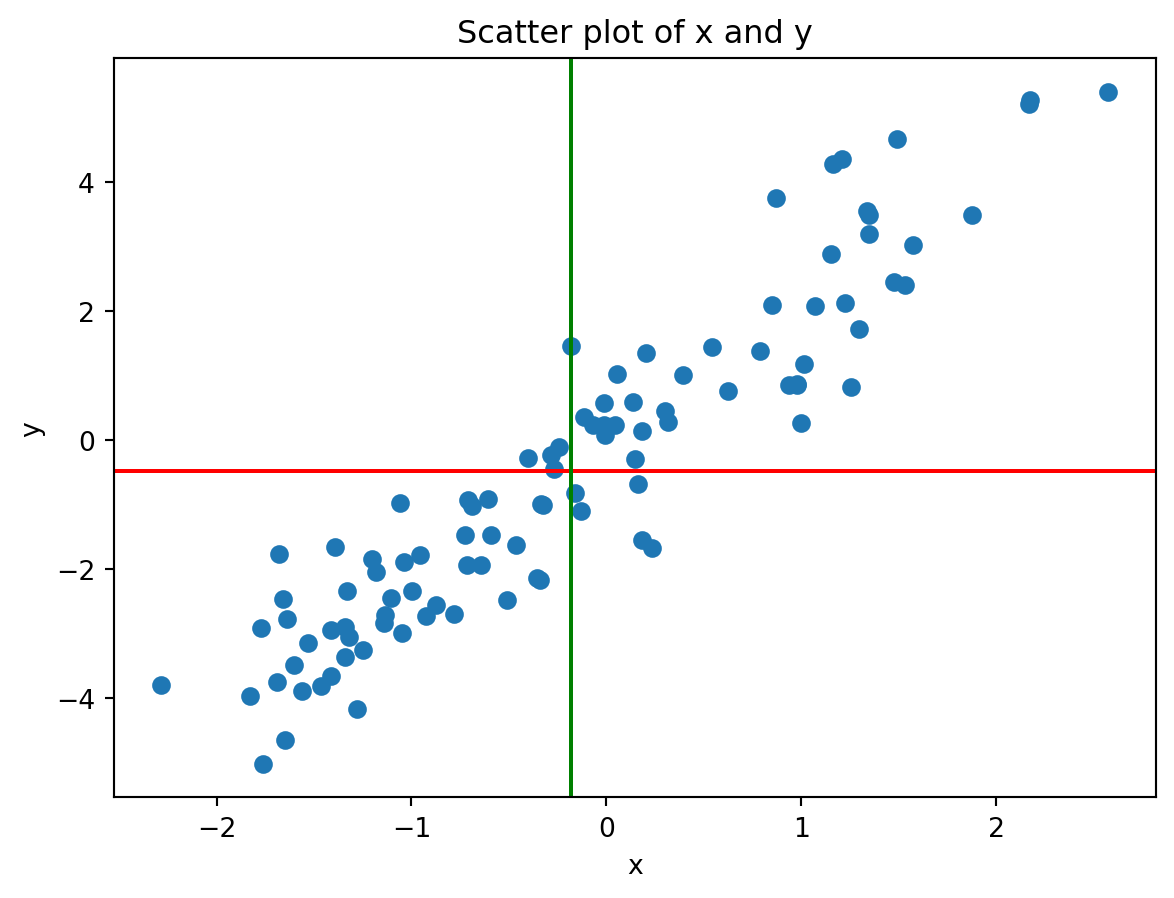

In [13]:
# Generate some data (positive linear relationship)

x1 = np.random.randn(100)
y1 = 2 * x1 + np.random.randn(100)

print("Sample mean of x:", np.mean(x1))
print("Sample mean of y:", np.mean(y1))
print("Covariance matrix of x and y:\n", np.cov(x1, y1))

# Plot 

plt.scatter(x1, y1)
plt.axhline(y = np.mean(y1), color='red')
plt.axvline(x = np.mean(x1), color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')



Sample mean of x: 0.06368874226709419
Sample mean of y: -0.30322648089122106
Covariance matrix of x and y:
 [[ 1.1528287  -2.54967921]
 [-2.54967921  6.4326463 ]]


Text(0.5, 1.0, 'Scatter plot of x and y')

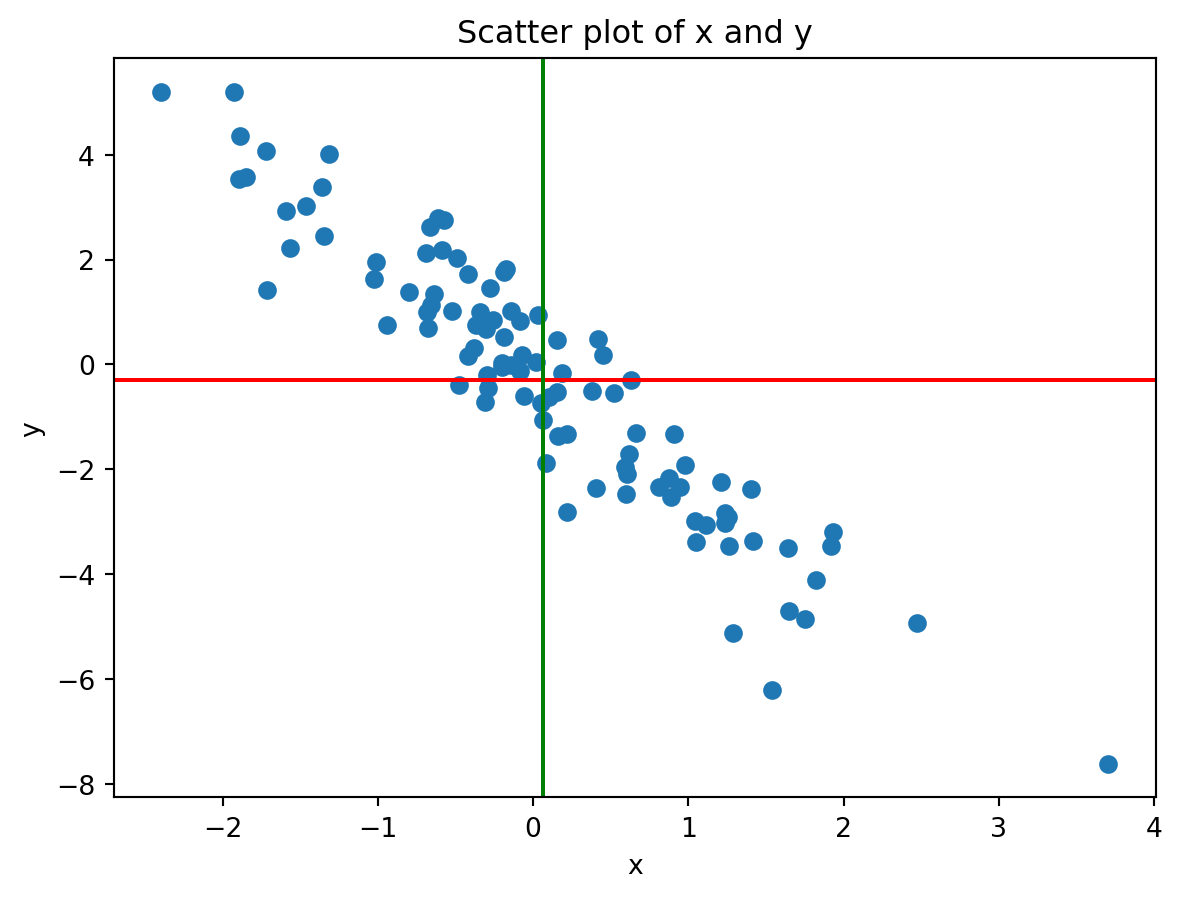

In [14]:
# Generate some data (negative linear relationship)

x2 = np.random.randn(100)
y2 = - 2 * x2 + np.random.randn(100)

print("Sample mean of x:", np.mean(x2))
print("Sample mean of y:", np.mean(y2))
print("Covariance matrix of x and y:\n", np.cov(x2, y2))

# Plot

plt.scatter(x2, y2)
plt.axhline(y = np.mean(y2), color='red')
plt.axvline(x = np.mean(x2), color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')

Sample mean of x: -0.1151667433321682
Sample mean of y: 0.01675276715293459
Covariance matrix of x and y:
 [[1.25134704 0.01935165]
 [0.01935165 0.72720524]]


Text(0.5, 1.0, 'Scatter plot of x and y')

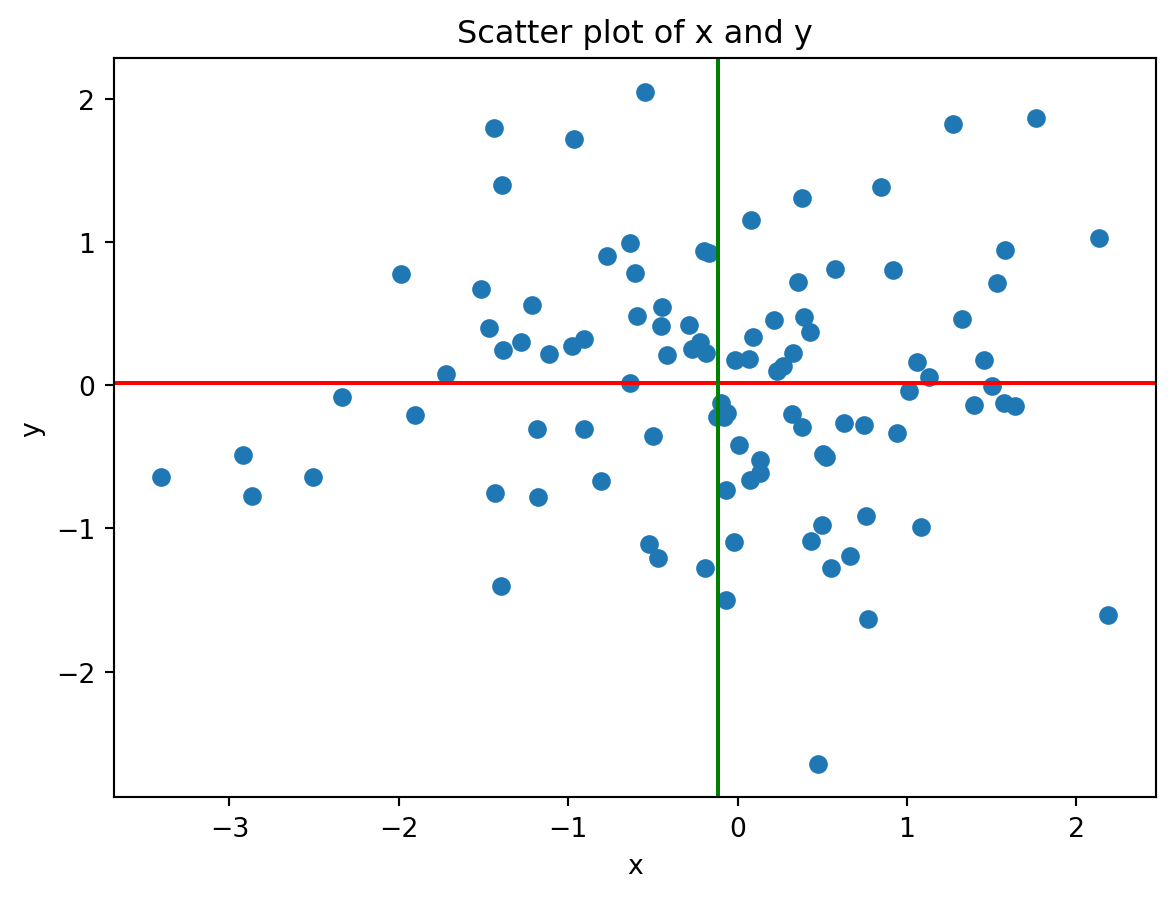

In [15]:
# Generate some data (no linear relationship)

x3 = np.random.randn(100)
y3 = np.random.randn(100)

print("Sample mean of x:", np.mean(x3))
print("Sample mean of y:", np.mean(y3))
print("Covariance matrix of x and y:\n", np.cov(x3, y3))

# Plot

plt.scatter(x3, y3)
plt.axhline(y = np.mean(y3), color='red')
plt.axvline(x = np.mean(x3), color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')

## Non-Linear Relationships

It is important to remember that the covariance only captures linear relationships between two random variables. If the relationship is non-linear, the covariance will still describe the linear relationship between the two variables. However, it may be close to zero even if there is a strong non-linear relationship between the two variables.

Sample mean of x: -0.3596901079856433
Sample mean of y: 0.010595306128669076
Covariance matrix of x and y:
 [[ 8.09188336e+00 -3.03243874e-03]
 [-3.03243874e-03  4.88561389e-01]]


Text(0.5, 1.0, 'Scatter plot of x and y')

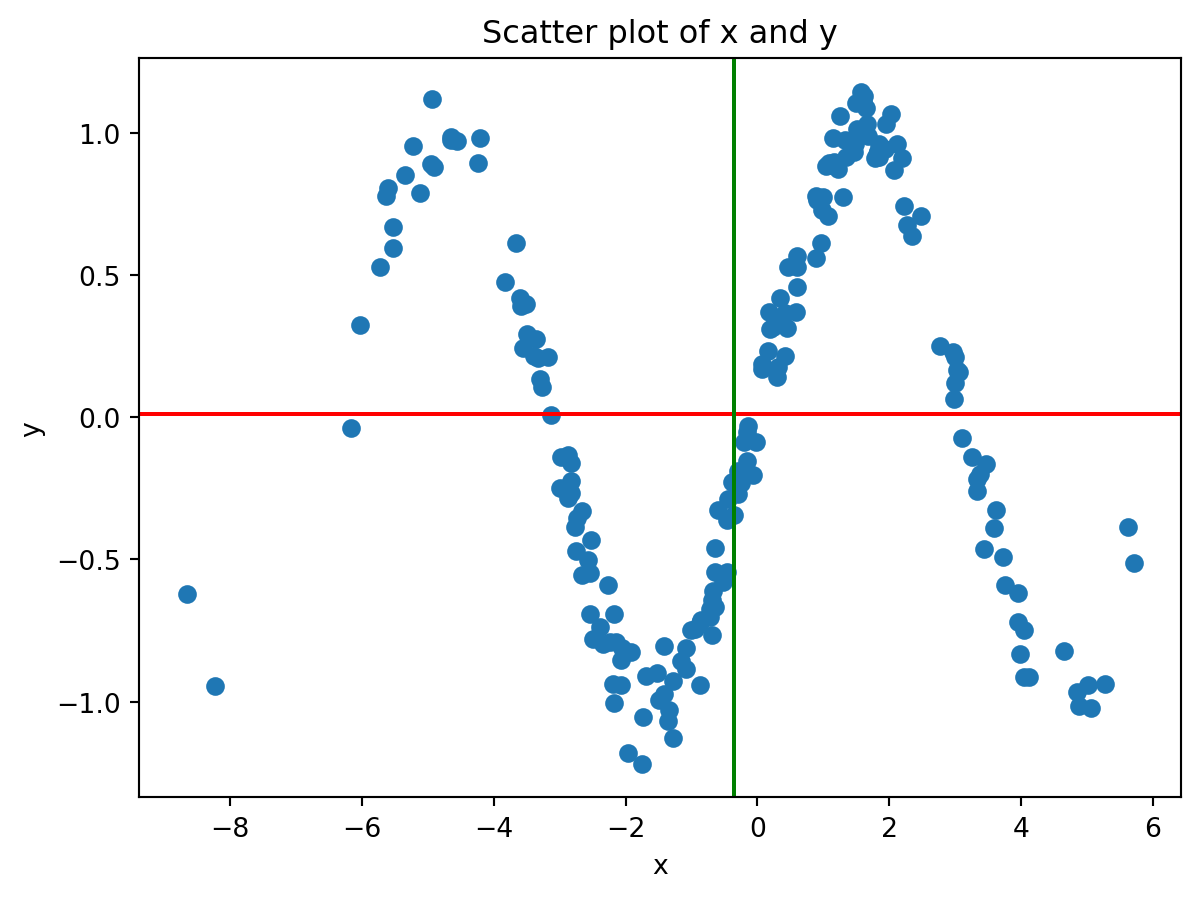

In [16]:
# Generate some data (quadratic relationship)

x4 = np.random.randn(200) * 3
y4 = np.sin(x4) + np.random.randn(200) * 0.1

print("Sample mean of x:", np.mean(x4))
print("Sample mean of y:", np.mean(y4))

print("Covariance matrix of x and y:\n", np.cov(x4, y4))

# Plot

plt.scatter(x4, y4)
plt.axhline(y = np.mean(y4), color='red')
plt.axvline(x = np.mean(x4), color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')

## Correlation

The **sign** of the covariance tells us about the direction of the relationship between two random variables. If the covariance is positive, the two variables tend to move in the same direction. If the covariance is negative, the two variables tend to move in opposite directions. However, we cannot say anything about how strong the relationship is.

The reason is that the covariance depends on the scale of the variables. For example, let's say we have two sets of measurements: height in m and monthly salary in 1000 USD.



In [17]:
height_m = np.array([1.66, 1.76, 1.80, 1.90, 2.00])
income_1000USD = np.array([2.1, 3.5, 4.1, 4.3, 3.7])

np.cov(height_m, income_1000USD)

array([[0.01708, 0.0778 ],
       [0.0778 , 0.748  ]])

In [18]:
# Now let's change the units of height to centimeters

height_cm = height_m * 100

np.cov(height_cm, income_1000USD)


array([[170.8  ,   7.78 ],
       [  7.78 ,   0.748]])

Notice that the covariance has changed and is now exactly 100 times larger than before. As an exercise, change the unit of measurement of the income to USD and see how the covariance changes.


## Of Variability and Variance

Until now we have discussed the span of the data and the inter-quartile range as measures of variability. Another measure of variability is the variance.

:::{#def-variance}
## The Sample Variance and Sample Standard Deviation

The variance of a collection of $n$ values $x_1, x_2, \ldots, x_n$ is calculated as the average (with a correction factor) of the squared differences between each value and the mean:

$$
\text{S}^2_{x} = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

This is a short way of writing:

$$
\text{S}^2_{x} = \frac{(x_1 - \bar{x})^2 + (x_2 - \bar{x})^2 + \ldots + (x_n - \bar{x})^2}{n - 1}
$$

The standard deviation is the square root of the variance:

$$
\text{S}_{x} = \sqrt{\text{S}^2_{x}}
$$

:::

What are the units of measurement of the variance and the standard deviation?

- Assume that x is measured in meters. What are the units of measurement of the variance and the standard deviation?
- Assume that x is measured in centimeters. What are the units of measurement of the variance and the standard deviation?
- Assume that x is measured in years. What are the units of measurement of the variance and the standard deviation?v


:::{#exm-variance}
## Computing the sample variance and the sample standard deviation

Given a set of measurements $x = (x_1 = 1, x_2 = 8, x_3 = 3)$, calculate the sample variance and the sample standard deviation.

:::
:::{.solution}

For the set $x$:

$$
\bar{x} = \frac{1 + 8 + 3}{3} = 4
$$

$$
\text{S}^2_{x} = \frac{(1 - 4)^2 + (8 - 4)^2 + (3 - 4)^2}{3 - 1} = \frac{9 + 16 + 1}{2} = 13
$$

:::


## The Covariance of Two Random Variables

Until now we have discussed the sample covariance, which is a measure of the linear relationship between two sets of observations. The covariance of two random variables is a generalization of the sample covariance to random variables. The covariance of two random variables $X$ and $Y$ is defined as

$$
\text{Cov}(X, Y) = E((X - E(X))(Y - E(Y)))
$$

where $E(X)$ and $E(Y)$ are the expectations of $X$ and $Y$, respectively. The covariance has the following properties:

1. $\text{Cov}(X, Y) = \text{Cov}(Y, X)$
2. $\text{Cov}(X, X) = \text{Var}(X)$
3. $\text{Cov}(aX, bY) = ab \text{Cov}(X, Y)$
4. $\text{Cov}(X + Y, Z) = \text{Cov}(X, Z) + \text{Cov}(Y, Z)$

## The Correlation between Two Random Variables

The correlation between two random variables $X$ and $Y$ is defined as

$$
\rho(X, Y) = \frac{\text{Cov}(X, Y)}{\sqrt{\text{Var}(X) \text{Var}(Y)}}
$$

The correlation is a standardized measure of the linear relationship between two random variables. It has the following properties:

1. $-1 \leq \rho(X, Y) \leq 1$
2. $\rho(X, Y) = 1$ if $Y = aX + b$ for some $a > 0$
3. $\rho(X, Y) = -1$ if $Y = aX + b$ for some $a < 0$
4. $\rho(X, Y) = 0$ if $X$ and $Y$ are independent. Note that the converse is generally not true (see the example with the empirical covariance above).

To see why these properties hold, consider the following scenarios:

$$
Y = 2X + 3
$$

$$
\begin{align*}
\text{Cov}(X, Y) & = \text{Cov}(X, 2X + 3) \\
                 & = E(X - E(X))(2X + 3 - E(2X + 3)) \\
                 & = E(X - E(X))(2X + 3 - 2E(X) - 3) \\
                 & = E(X - E(X))(2X - 2E(X)) \\
                 & = 2E(X - E(X))^2 \\
                 & = 2\text{Var}(X)
\end{align*}
$$

Substituting this into the formula for the correlation, we get

$$
\rho(X, Y) = \frac{2\text{Var}(X)}{\sqrt{\text{Var}(X) \text{Var}(2X + 3)}} = 1
$$

